In [7]:
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
df = pd.read_csv("data/ID_to_Image_Mapping.csv")
df.head()

,id,image_id
0,1,00000865_006.png
1,2,00028383_002.png
2,3,00027577_003.png
3,4,00000468_033.png
4,5,00013922_021.png


In [9]:
print("size test dataset", df.shape)

size test dataset (148, 2)


In [10]:
df_train = pd.read_csv("train.csv")
df_train.head()

,Image Index,Finding Label,Bbox [x,y,w,h]
0,00021840_016.png,Infiltrate,160.995556,440.642378,268.515556,187.733333
1,00021364_001.png,Cardiomegaly,335.728814,450.476844,495.728814,305.898305
2,00018865_008.png,Pneumothorax,209.920000,133.442378,144.497778,92.160000
3,00029502_006.png,Effusion,148.452910,452.943915,256.812698,393.346032
4,00016705_006.png,Infiltrate,691.200000,308.660156,95.573333,237.795556


In [11]:
print("size of the training dataset", df_train.shape)

size of the training dataset (836, 6)


# Histogram of labels


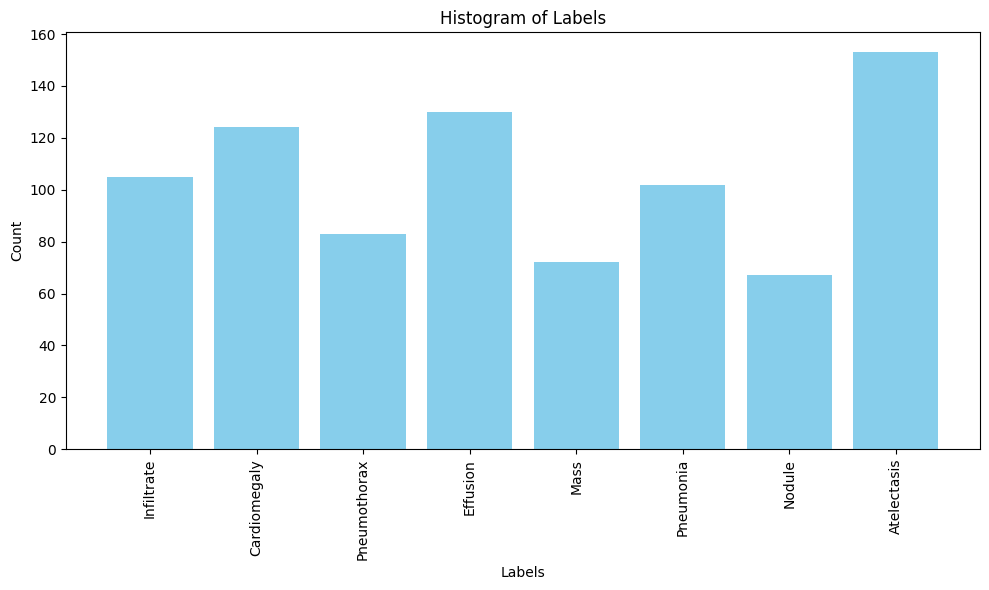

In [12]:
from collections import Counter

label_counts = Counter([label for label in df_train["Finding Label"]])

plt.figure(figsize=(10, 6))
plt.bar(label_counts.keys(), label_counts.values(), color="skyblue")
plt.xlabel("Labels")
plt.ylabel("Count")
plt.title("Histogram of Labels")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# Histogram of Number of annotations


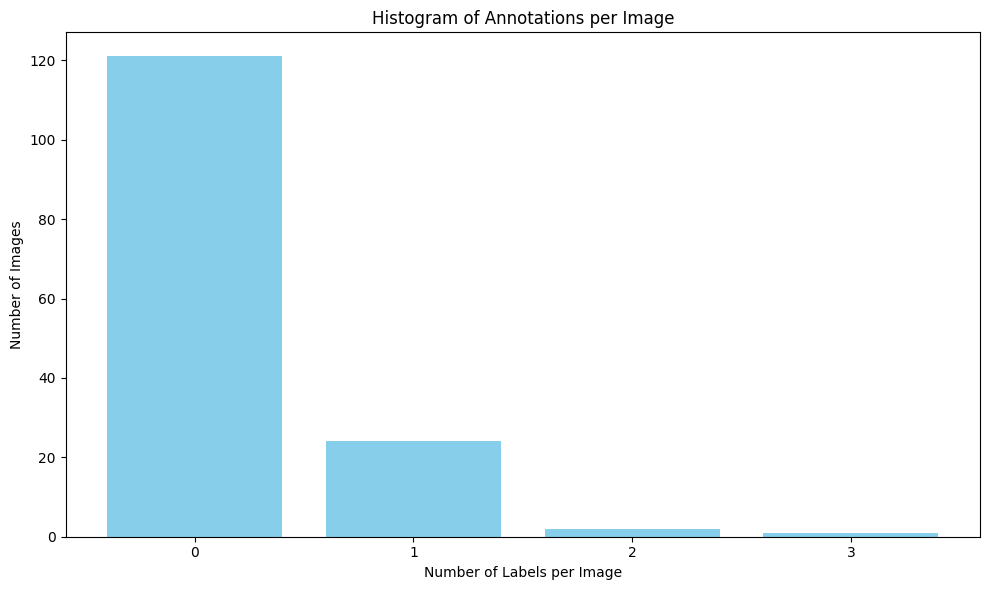

In [ ]:
df_labels = pd.read_csv(
    "data/ID_to_Image_Mapping.csv"
)  # colonnes: id, image_id
df_annots = pd.read_csv(
    "train.csv"
)  # colonnes: Image Index, Finding Label, x, y, w, h

# Convertir labels multi-classes par image
df_grouped = (
    df_annots.groupby("Image Index")["Finding Label"].apply(set).reset_index()
)
df = df_labels.merge(
    df_grouped, left_on="image_id", right_on="Image Index", how="left"
)
df["Finding Label"] = df["Finding Label"].apply(
    lambda x: x if isinstance(x, set) else set()
)

# Plot the number of annotations per image
df["num_labels"] = df["Finding Label"].apply(len)
val_counts = df["num_labels"].value_counts().sort_index()


plt.figure(figsize=(10, 6))
plt.bar(val_counts.index.astype(str), val_counts.values, color="skyblue")
plt.xlabel("Number of Labels per Image")
plt.ylabel("Number of Images")
plt.title("Histogram of Annotations per Image")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
print(df)

      id          image_id       Image Index Finding Label  num_labels
0      1  00000865_006.png               NaN            {}           0
1      2  00028383_002.png  00028383_002.png  {Infiltrate}           1
2      3  00027577_003.png               NaN            {}           0
3      4  00000468_033.png               NaN            {}           0
4      5  00013922_021.png               NaN            {}           0
..   ...               ...               ...           ...         ...
143  144  00022416_048.png               NaN            {}           0
144  145  00011502_001.png               NaN            {}           0
145  146  00014976_003.png               NaN            {}           0
146  147  00012261_001.png  00012261_001.png   {Pneumonia}           1
147  148  00015078_013.png               NaN            {}           0

[148 rows x 5 columns]
